# Machine Learning (CS60050)<br> Assignment 1 - Decision Tree

## Topic: Indian Liver Patient Dataset

#### By: (Group 32)<br>Krinal Patel (21CS60R39)<br>Sarvesh Gupta (21CS60R53)

## Deatils of Dataset:
This Dataset of "Indian Liver Patient Dataset" is taken from kaggle. This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups (liver patient or not). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

#### Attributes of Dataset:
This data set has 11 columns: <br>
1. age : Age of the patient <br>
2. gender : Gender of the patient <br>
3. tot_bilirubin : Total Bilirubin <br>
4. direct_bilirubin : Direct Bilirubin <br>
5. alkphos : Alkaline Phosphotase <br>
6. sgpt : Alamine Aminotransferase <br>
7. sgot : Aspartate Aminotransferase <br>
8. tot_proteins : Total Protiens <br>
9. albumin : Albumin <br>
10. ag_ratio : Albumin and Globulin Ratio <br>
11. is_patient : Selector field used to split the data into two sets

 #### Link of Dataset:
 Indian Liver Patient Dataset: https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset

#### Importing all the required libraries:

In [1]:
import pandas as pd
import numpy as np
from math import log2
import math
from decimal import Decimal
import matplotlib.pyplot as plt
import copy

#### Reading the dataset:

In [2]:
df=pd.read_csv('ILPD.csv')

## Data Understanding

#### Top 5 rows of dataset

In [3]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Deatils about Dataset

In [4]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### Column Names

In [5]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

#### Datatypes of all the Columns

In [6]:
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

#### Shape of Dataset

In [7]:
df.shape

(583, 11)

Rows: 583<br>
Column: 11

## Data Preparation

#### Display Number of NULL cells in each column

In [8]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

#### Replacing the NULL values with median of the column

In [9]:
df['alkphos'].fillna(df['alkphos'].median(), inplace = True)

#### Display Number of NULL cells in each column

In [10]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

#### Shape of Dataset

In [11]:
df.shape

(583, 11)

Rows: 583<br>
Column: 11<br>
No Row is eliminated, to clean the data.

#### Displaying List of Features, and Target Attribute:

In [12]:
notation = {0: '< ', 1:'> '}
features=list(df.columns)
target=features[-1]
features=features[:-1]
print("features: ",features)
print("Target attribute: ",target)

features:  ['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']
Target attribute:  is_patient


#### Function to split dataset for training and testing of the model

In [13]:
def train_test_split(dataset,test_size,seed):
    train=dataset.sample(frac=(1-test_size),random_state=seed) #random state is a seed value
    test=dataset.drop(train.index,inplace=False)
    return train,test

#### Compute Correaltion of all attributes with target attribute

In [14]:
df.corrwith(df[target])

age                -0.137351
tot_bilirubin      -0.220208
direct_bilirubin   -0.246046
tot_proteins       -0.184866
albumin            -0.163416
ag_ratio           -0.151934
sgpt                0.035008
sgot                0.161388
alkphos             0.162144
is_patient          1.000000
dtype: float64

#### Description of all the columns

In [15]:
for i in df.columns:
  print(i)
  print(df['age'].describe())
  print("==========================================")

age
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64
gender
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64
tot_bilirubin
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64
direct_bilirubin
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64
tot_proteins
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64
albumin
count  

#### Histogram Representing value distribution of all the attribute

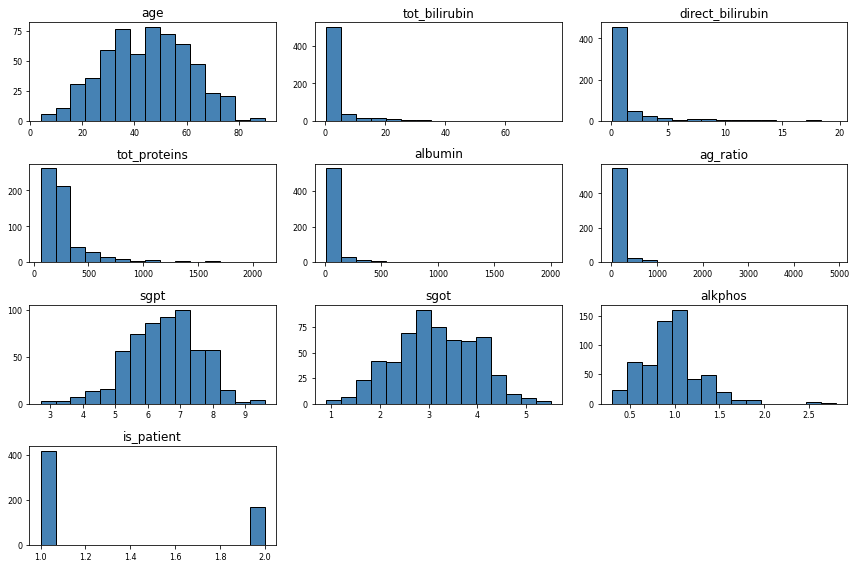

In [16]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

## Tree Printing Function

#### Print tree with hierarchical levels of data attributes

In [17]:
def printtree(tree,depth=1):
    if isinstance(tree,dict):
        key=list(tree.keys())[0]
        
        if isinstance(tree[key],dict):
            for k in tree[key]:
                for i in range(1,depth):
                     print("|    ",end="")
                     if i == depth-1:
                        print("|----",end="")
                print(key,end=" ")
                print(k)
                
                printtree(tree[key][k],depth+1)
              
        else:
          
            for i in range(1,depth):
                print("|    ",end="")
                if i==depth-1: 
                    print("|----",end="")
            print(key,end=" ")
            print(tree[key])
    else:
        
        for i in range(1,depth):
            print("|    ",end="")
            if i==depth-1:
                print("|----",end="")
        print("class: ",tree)

## Decision Tree Making

#### Used to split data into subsets, for values coming under same category

In [18]:
def get_subset(dataset,feature,feature_val):
    return dataset[dataset[feature] == feature_val].reset_index(drop=True,inplace=False)
def get_subset_numerical_feature(dataset,feature,threshold,greater):
    if greater==0:
        return dataset[dataset[feature]<threshold].reset_index(drop=True,inplace=False)
    else:
        return dataset[dataset[feature]>=threshold].reset_index(drop=True,inplace=False)

#### Function to Calculate Entropy

In [19]:
def entropy(dataset,target):
    res=0
    s=len(dataset)
    
    uniques=dataset[target].unique()
   
    for e in uniques:
        c=len(dataset[dataset[target]==e])
        if(c!=0):
            res -= (c/s)*log2(c/s)
    
    return res 

#### To select attribute based on max information gain

In [20]:
def max_info_gain(dataset,features,target):
    selected_attribute=None
    max_info_gain=None
    selected_threshold=None
    threshold=None
    
    entropy_of_root=entropy(dataset,target)
     
    for i in features:
        
        info_gain=entropy_of_root
        
        unique_vals=list(dataset[i].unique())
  
        if i=='gender':
            for j in unique_vals:
                temp_dataset=get_subset(dataset,i,j)
                entropy_attribute=entropy(temp_dataset,target)
                
                info_gain-=(len(temp_dataset)/len(dataset))*entropy_attribute
        else :
            min_entropy=None
            threshold=None
                
            j=dataset[i].median(axis=0)  
            j=round(j,2)
            set1=get_subset_numerical_feature(dataset,i,j,0)
            set2=get_subset_numerical_feature(dataset,i,j,1)
            e1=0
            e2=0
            if len(set1)!=0:
                e1=(len(set1)/len(dataset))*entropy(set1,target)
            if len(set2)!=0:
                e2=(len(set2)/len(dataset))*entropy(set2,target)
            if min_entropy is None:
                min_entropy=e1+e2
                threshold=j
            elif min_entropy>e1+e2:
                min_entropy=e1+e2
                threshold=j
        
        info_gain-=min_entropy
        
        if max_info_gain == None:
            max_info_gain=info_gain
            selected_attribute=i
            selected_threshold=threshold

           
        if info_gain>max_info_gain:
            max_info_gain=info_gain 
            selected_attribute=i
            selected_threshold=threshold
    
    return selected_attribute,selected_threshold

#### Build Tree for Information Gain

In [21]:
def build_tree_info_gain(dataset,features,target,max_depth=math.inf,cur_depth=1,tree=None):
     
    selected_attribute,threshold=max_info_gain(dataset,features,target)
    attr_values=[0,1]
     
    if tree is None:                    
        tree={}
        tree[selected_attribute] = {}
    if selected_attribute=='gender' :
        attr_values=list(dataset[selected_attribute].unique())
    for i in attr_values:
        key=None
        if selected_attribute=='gender':
            subset=get_subset(dataset,selected_attribute,i)
            key=i
        else:
            subset=get_subset_numerical_feature(dataset,selected_attribute,threshold,i)
            key=notation[i]+str(threshold)
        classval,counts = np.unique(subset[target],return_counts=True)     
        
        
        if len(counts)==1:
            
            tree[selected_attribute][key] = classval[0]     
        
        elif cur_depth==max_depth:
            tree[selected_attribute][key]= classval[1] if counts[1]>counts[0] else classval[0]
        else:
            
            updated_features=features
            tree[selected_attribute][key] = build_tree_info_gain(subset,updated_features,target,max_depth,cur_depth+1) 

    return tree

#### Accuracy of Instance of a Tree

In [22]:
def accuracy_of_the_tree(instance, Tree):
    
    result=None
    attribute = list(Tree.keys())[0] 
    
    if attribute=='gender' :
        if instance[attribute] in Tree[attribute].keys():
            result = Tree[attribute][instance[attribute]]
        if isinstance(result, dict): 
            return accuracy_of_the_tree(instance, result)
        else:
            return result 
    else:
        threshold=Decimal(list(Tree[attribute].keys())[0][2:])
        
        if instance[attribute]<threshold:     
            result= Tree[attribute][notation[0]+str(threshold)]
           
        else:
            result= Tree[attribute][notation[1]+str(threshold)]
            
        if isinstance(result, dict): 
            return accuracy_of_the_tree(instance, result)
            
        else:
            return result 

#### Accuracy of Complete Tree

In [23]:
def accuracy(dataset,tree):
    tp=0
    tn=0
    fp=0
    fn=0
    for index, row in dataset.iterrows():
        
        ans=accuracy_of_the_tree(row[:-1],tree)
           
        if ans==row[-1]:
            if ans == 1:
                tp=tp+1
            else:
                tn=tn+1
        else:
            if ans==1:
                fp=fp+1
            else:
                fn=fn+1   
    precision= tp/(tp+fp)
    recall= tp/(tp+fn)
    f1_score=2*((precision*recall)/(precision+recall))
    acc=(tp+tn)/(tp+tn+fp+fn)
    print("True Positve:",tp," True Negative: ",tn," False Positive: ",fp," False Negative ",fn)
    print("Precision: ",round(precision,2)," Recall: ",round(recall,2)," F1 Score: ",round(f1_score,2)," Accuracy: ",round(acc,2))
    return acc

#### Spliting of Dataset into Training Set and Test Set

In [24]:
training_data,test_data=train_test_split(df,test_size=.20,seed=42)

#### Building Tree for Training Dataset

In [25]:
tree=build_tree_info_gain(training_data,features,target)

#### Printing the tree build by training dataset

In [26]:
printtree(tree)

tot_proteins < 208.0
|    |----ag_ratio < 31.0
|    |    |----ag_ratio < 21.0
|    |    |    |----sgot < 3.4
|    |    |    |    |----albumin < 20.0
|    |    |    |    |    |----albumin < 14.0
|    |    |    |    |    |    |----class:  2
|    |    |    |    |    |----albumin > 14.0
|    |    |    |    |    |    |----tot_proteins < 170.5
|    |    |    |    |    |    |    |----tot_bilirubin < 0.7
|    |    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |    |    |----tot_bilirubin > 0.7
|    |    |    |    |    |    |    |    |----class:  2
|    |    |    |    |    |    |----tot_proteins > 170.5
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |----albumin > 20.0
|    |    |    |    |    |----albumin < 24.0
|    |    |    |    |    |    |----age < 39.0
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |    |----age > 39.0
|    |    |    |    |    |    |    |----tot_proteins < 170.0
|    |    |    |    |    |    |    |

#### Accuracy of Tree, when tested on training dataset

In [27]:
accuracy(training_data,tree)

True Positve: 326  True Negative:  123  False Positive:  9  False Negative  8
Precision:  0.97  Recall:  0.98  F1 Score:  0.97  Accuracy:  0.96


0.9635193133047211

#### Accuracy of Tree, when tested on test dataset

In [28]:
accuracy(test_data,tree)

True Positve: 63  True Negative:  14  False Positive:  21  False Negative  19
Precision:  0.75  Recall:  0.77  F1 Score:  0.76  Accuracy:  0.66


0.6581196581196581

#### Accuracy of Tree, when tested on complete dataset

In [29]:
accuracy(df,tree)

True Positve: 389  True Negative:  137  False Positive:  30  False Negative  27
Precision:  0.93  Recall:  0.94  F1 Score:  0.93  Accuracy:  0.9


0.902229845626072

#### Calculate the Gini Index

In [30]:
def gini_index(dataset,target):
    res=0
    s=len(dataset)
    
    uniques=dataset[target].unique()
   
    for e in uniques:
        c=len(dataset[dataset[target]==e])
        if(c!=0):
            res= (c/s)*(1-(c/s))
    
    return res 

#### To select attribute based on max gini gain

In [31]:
def max_gini_gain(dataset,features,target):
    selected_attribute=None
    max_gini_gain=None
    selected_threshold=None
    threshold=None
    
    gini_of_root=gini_index(dataset,target)
     
    for i in features:
        
        gini_gain=gini_of_root
        
        unique_vals=list(dataset[i].unique())
        if i=='gender' :
            
          
            for j in unique_vals:
                temp_dataset=get_subset(dataset,i,j)
                gini_attribute=gini_index(temp_dataset,target)
                
                gini_gain-=(len(temp_dataset)/len(dataset))*gini_attribute
        else :
            min_gain=None
            threshold=None
            
            
            j=dataset[i].median()   
            j=round(j,2)
            set1=get_subset_numerical_feature(dataset,i,j,0)
            set2=get_subset_numerical_feature(dataset,i,j,1)
            e1=0
            e2=0
            if len(set1)!=0:
                e1=(len(set1)/len(dataset))*gini_index(set1,target)
            if len(set2)!=0:
                e2=(len(set2)/len(dataset))*gini_index(set2,target)
            if min_gain is None:
                min_gain=e1+e2
                threshold=j
            elif min_gain>e1+e2:
                min_gain=e1+e2
                threshold=j
              
            gini_gain-=min_gain

        if max_gini_gain == None:
            max_gini_gain=gini_gain 
            selected_attribute=i
            selected_threshold=threshold         
        elif gini_gain>max_gini_gain:
            max_gini_gain=gini_gain 
            selected_attribute=i
            selected_threshold=threshold
    
    return selected_attribute,selected_threshold

#### Build Tree for Gini Gain

In [32]:
def build_tree_gini(dataset,features,target,max_depth=math.inf,cur_depth=1,tree=None):
     
    selected_attribute,threshold=max_gini_gain(dataset,features,target)
    attr_values=[0,1]
    if tree is None:                    
        tree={}
        tree[selected_attribute] = {}
    if selected_attribute=='gender':
        attr_values=list(dataset[selected_attribute].unique())
    for i in attr_values:
        key=None
        if selected_attribute=='gender':
            subset=get_subset(dataset,selected_attribute,i)
            key=i
        else:
            subset=get_subset_numerical_feature(dataset,selected_attribute,threshold,i)
            key= notation[i]+str(threshold)
        classval,counts = np.unique(subset[target],return_counts=True)     
         
        
        if len(counts)==1:
           tree[selected_attribute][key] = classval[0]
                                                           
        elif cur_depth==max_depth:
            tree[selected_attribute][key]= classval[1] if counts[1]>counts[0] else classval[0]
        else:
            updated_features=features
            tree[selected_attribute][key] = build_tree_gini(subset,updated_features,target,max_depth,cur_depth+1) 

    return tree

In [33]:
training_data,test_data=train_test_split(df,test_size=.20,seed=42)
tree=build_tree_gini(training_data,features,target)

In [34]:
printtree(tree)

tot_proteins < 208.0
|    |----ag_ratio < 31.0
|    |    |----gender Male
|    |    |    |----direct_bilirubin < 0.2
|    |    |    |    |----sgpt < 5.85
|    |    |    |    |    |----age < 47.0
|    |    |    |    |    |    |----class:  1
|    |    |    |    |    |----age > 47.0
|    |    |    |    |    |    |----age < 63.0
|    |    |    |    |    |    |    |----class:  2
|    |    |    |    |    |    |----age > 63.0
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |----sgpt > 5.85
|    |    |    |    |    |----age < 52.0
|    |    |    |    |    |    |----age < 39.5
|    |    |    |    |    |    |    |----class:  2
|    |    |    |    |    |    |----age > 39.5
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |----age > 52.0
|    |    |    |    |    |    |----age < 56.0
|    |    |    |    |    |    |    |----tot_proteins < 174.5
|    |    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |    |    |----tot_proteins >

## Accuracy by averaging over 10 random 80/20 splits 

#### For the tree of Information gain 

In [35]:
acc=0
max_accuracy=None
best_tree=None
final_train_data,final_test_data=None,None
for i in range(1,11):
    training_data,test_data=train_test_split(df,test_size=0.20,seed=2*i*i)
     
    temp_tree=build_tree_info_gain(training_data,features,target)
    cur_acc=accuracy(test_data,temp_tree)
    acc=acc+cur_acc
    if best_tree==None:
        best_tree=temp_tree
        max_accuracy=cur_acc
        
        final_train_data,final_test_data=training_data,test_data
    elif cur_acc>max_accuracy:
        best_tree=temp_tree
        max_accuracy=cur_acc
       
        final_train_data,final_test_data=training_data,test_data
     
print("Average accuracy of Tree(Info Gain): ",round(acc/10,2))

True Positve: 55  True Negative:  17  False Positive:  22  False Negative  23
Precision:  0.71  Recall:  0.71  F1 Score:  0.71  Accuracy:  0.62
True Positve: 71  True Negative:  12  False Positive:  14  False Negative  20
Precision:  0.84  Recall:  0.78  F1 Score:  0.81  Accuracy:  0.71
True Positve: 65  True Negative:  13  False Positive:  21  False Negative  18
Precision:  0.76  Recall:  0.78  F1 Score:  0.77  Accuracy:  0.67
True Positve: 59  True Negative:  19  False Positive:  20  False Negative  19
Precision:  0.75  Recall:  0.76  F1 Score:  0.75  Accuracy:  0.67
True Positve: 70  True Negative:  10  False Positive:  18  False Negative  19
Precision:  0.8  Recall:  0.79  F1 Score:  0.79  Accuracy:  0.68
True Positve: 64  True Negative:  10  False Positive:  22  False Negative  21
Precision:  0.74  Recall:  0.75  F1 Score:  0.75  Accuracy:  0.63
True Positve: 59  True Negative:  13  False Positive:  27  False Negative  18
Precision:  0.69  Recall:  0.77  F1 Score:  0.72  Accuracy:

#### For the tree of Gini gain

In [36]:
acc=0

for i in range(1,11):
    training_data,test_data=train_test_split(df,test_size=0.20,seed=2*i*i)
    
    temp_tree=build_tree_gini(training_data,features,target)
    cur_acc=accuracy(test_data,temp_tree)
    acc=acc+cur_acc
    if best_tree==None:
        best_tree=temp_tree
        max_accuracy=cur_acc
        
        final_train_data,final_test_data=training_data,test_data
    elif cur_acc>max_accuracy:
        best_tree=temp_tree
        max_accuracy=cur_acc
        
        final_train_data,final_test_data=training_data,test_data

print("Average accuracy of Tree(Gini Gain): ",round(acc/10,2))

True Positve: 57  True Negative:  16  False Positive:  23  False Negative  21
Precision:  0.71  Recall:  0.73  F1 Score:  0.72  Accuracy:  0.62
True Positve: 67  True Negative:  15  False Positive:  11  False Negative  24
Precision:  0.86  Recall:  0.74  F1 Score:  0.79  Accuracy:  0.7
True Positve: 67  True Negative:  11  False Positive:  23  False Negative  16
Precision:  0.74  Recall:  0.81  F1 Score:  0.77  Accuracy:  0.67
True Positve: 62  True Negative:  18  False Positive:  21  False Negative  16
Precision:  0.75  Recall:  0.79  F1 Score:  0.77  Accuracy:  0.68
True Positve: 65  True Negative:  10  False Positive:  18  False Negative  24
Precision:  0.78  Recall:  0.73  F1 Score:  0.76  Accuracy:  0.64
True Positve: 61  True Negative:  10  False Positive:  22  False Negative  24
Precision:  0.73  Recall:  0.72  F1 Score:  0.73  Accuracy:  0.61
True Positve: 59  True Negative:  18  False Positive:  22  False Negative  18
Precision:  0.73  Recall:  0.77  F1 Score:  0.75  Accuracy:

#### Calculate Number of Nodes, and Depth of tree

In [37]:
def depth_nodes(tree):
    if isinstance(tree,dict):
        max_depth=None
        total_nodes=0
        attribute=list(tree.keys())[0]
        if isinstance(tree[attribute],dict):
          for k in tree[attribute]:
            cur_depth,nodes=depth_nodes(tree[attribute][k])
            total_nodes+=nodes
            if max_depth==None:
                max_depth=cur_depth
            elif cur_depth>max_depth:
                max_depth=cur_depth
          return 1+max_depth,total_nodes+1
        
        else:
          return 1,2
    return 0,1

#### Function to calculate Depth and Number of Nodes till that Depth

In [38]:
depth,no_of_nodes=depth_nodes(best_tree)
print("maximum depth of a best tree",depth)
accuracy_list = []
depth_list = []
nodes_list = []
most_acc_depth_tree = None
max_acc = 0
for i in range (1,depth+1):
    tree1=build_tree_info_gain(final_train_data,features,target,i,1)
    d,n=depth_nodes(tree1)
    print("Iteration: ",i," Depth: ",d," Nodes: ",n)
    a = accuracy(final_test_data,tree1)
    accuracy_list.append(round(a,2))
    depth_list.append(d)
    nodes_list.append(n)
    if i>1:
        if(max_acc < a):
            most_acc_depth_tree = tree1
            max_acc = a

maximum depth of a best tree 11
Iteration:  1  Depth:  1  Nodes:  3
True Positve: 91  True Negative:  0  False Positive:  26  False Negative  0
Precision:  0.78  Recall:  1.0  F1 Score:  0.88  Accuracy:  0.78
Iteration:  2  Depth:  2  Nodes:  7
True Positve: 74  True Negative:  6  False Positive:  20  False Negative  17
Precision:  0.79  Recall:  0.81  F1 Score:  0.8  Accuracy:  0.68
Iteration:  3  Depth:  3  Nodes:  15
True Positve: 75  True Negative:  6  False Positive:  20  False Negative  16
Precision:  0.79  Recall:  0.82  F1 Score:  0.81  Accuracy:  0.69
Iteration:  4  Depth:  4  Nodes:  31
True Positve: 80  True Negative:  8  False Positive:  18  False Negative  11
Precision:  0.82  Recall:  0.88  F1 Score:  0.85  Accuracy:  0.75
Iteration:  5  Depth:  5  Nodes:  61
True Positve: 78  True Negative:  8  False Positive:  18  False Negative  13
Precision:  0.81  Recall:  0.86  F1 Score:  0.83  Accuracy:  0.74
Iteration:  6  Depth:  6  Nodes:  115
True Positve: 77  True Negative:  9

#### Final Decision Tree till best depth limit

In [39]:
# Tree asked in Q5
printtree(most_acc_depth_tree)

ag_ratio < 41.0
|    |----ag_ratio < 25.0
|    |    |----sgpt < 6.8
|    |    |    |----ag_ratio < 19.0
|    |    |    |    |----class:  1
|    |    |    |----ag_ratio > 19.0
|    |    |    |    |----class:  2
|    |    |----sgpt > 6.8
|    |    |    |----albumin < 22.0
|    |    |    |    |----class:  2
|    |    |    |----albumin > 22.0
|    |    |    |    |----class:  1
|    |----ag_ratio > 25.0
|    |    |----tot_bilirubin < 0.8
|    |    |    |----ag_ratio < 30.0
|    |    |    |    |----class:  2
|    |    |    |----ag_ratio > 30.0
|    |    |    |    |----class:  1
|    |    |----tot_bilirubin > 0.8
|    |    |    |----direct_bilirubin < 0.3
|    |    |    |    |----class:  1
|    |    |    |----direct_bilirubin > 0.3
|    |    |    |    |----class:  1
ag_ratio > 41.0
|    |----direct_bilirubin < 1.0
|    |    |----albumin < 48.0
|    |    |    |----tot_bilirubin < 0.8
|    |    |    |    |----class:  2
|    |    |    |----tot_bilirubin > 0.8
|    |    |    |    |----class:  1
|

#### Printing the Accuracy along with Depth and Number of Nodes

In [40]:
for i in range(depth):
    print("Accuracy: ",accuracy_list[i]," Depth: ",depth_list[i]," Nodes: ",nodes_list[i])

Accuracy:  0.78  Depth:  1  Nodes:  3
Accuracy:  0.68  Depth:  2  Nodes:  7
Accuracy:  0.69  Depth:  3  Nodes:  15
Accuracy:  0.75  Depth:  4  Nodes:  31
Accuracy:  0.74  Depth:  5  Nodes:  61
Accuracy:  0.74  Depth:  6  Nodes:  115
Accuracy:  0.74  Depth:  7  Nodes:  191
Accuracy:  0.71  Depth:  8  Nodes:  271
Accuracy:  0.73  Depth:  9  Nodes:  317
Accuracy:  0.71  Depth:  10  Nodes:  327
Accuracy:  0.71  Depth:  11  Nodes:  329


#### Graph of Depth vs Accuracy

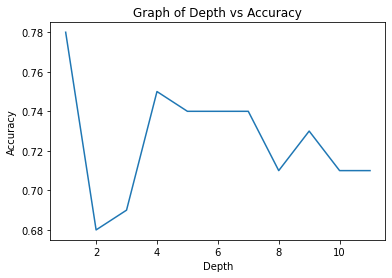

In [41]:
plt.plot(depth_list,accuracy_list)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Graph of Depth vs Accuracy')
plt.show()

#### Graph of Number of Nodes vs Accuracy

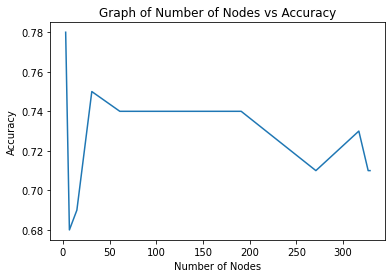

In [42]:
plt.plot(nodes_list,accuracy_list)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Graph of Number of Nodes vs Accuracy')
plt.show()

#### Final Tree Before Pruning 

In [43]:
printtree(best_tree)

ag_ratio < 41.0
|    |----ag_ratio < 25.0
|    |    |----sgpt < 6.8
|    |    |    |----ag_ratio < 19.0
|    |    |    |    |----ag_ratio < 15.0
|    |    |    |    |    |----albumin < 14.0
|    |    |    |    |    |    |----class:  2
|    |    |    |    |    |----albumin > 14.0
|    |    |    |    |    |    |----ag_ratio < 14.0
|    |    |    |    |    |    |    |----class:  2
|    |    |    |    |    |    |----ag_ratio > 14.0
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |----ag_ratio > 15.0
|    |    |    |    |    |----direct_bilirubin < 0.2
|    |    |    |    |    |    |----class:  1
|    |    |    |    |    |----direct_bilirubin > 0.2
|    |    |    |    |    |    |----albumin < 21.0
|    |    |    |    |    |    |    |----albumin < 15.0
|    |    |    |    |    |    |    |    |----class:  2
|    |    |    |    |    |    |    |----albumin > 15.0
|    |    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |    |----albumin > 21.0
|    |

#### Accuracy of Final Tree before pruning

In [44]:
acc_bp=accuracy(final_test_data,best_tree)
print(round(acc_bp,2))

True Positve: 71  True Negative:  12  False Positive:  14  False Negative  20
Precision:  0.84  Recall:  0.78  F1 Score:  0.81  Accuracy:  0.71
0.71


#### Depth and Number of Nodes before Pruning

In [45]:
depth, nodes = depth_nodes(best_tree)
print('Depth of Tree before pruning:',depth)
print('Number of Nodes in Tree before pruning:',nodes)

Depth of Tree before pruning: 11
Number of Nodes in Tree before pruning: 329


## Pruning of Final Tree

#### Creating a copy of Best Tree

In [46]:
fix_tree = copy.deepcopy(best_tree)

#### Function for Pruning

In [47]:
def pruning_tree(dataset,tree,alpha,parent=None,ax=None,bx=None):
   
    na1=len(dataset[dataset[target]==1])
    na2=len(dataset[dataset[target]==2])
     
    if na1+na2>0 and isinstance(tree,dict):
        attribute=list(tree.keys())[0]
        ans=0
        if isinstance(tree[attribute],dict):
            for k in tree[attribute].keys():
                subset=None
                if attribute=='gender':
                    subset=dataset[dataset[attribute]==k]
                elif k[0]=='<':
                    subset=dataset[dataset[attribute]<Decimal(k[2:])]
                else:
                    subset=dataset[dataset[attribute]>=Decimal(k[2:])]
                na,nb=pruning_tree(subset,tree[attribute][k],alpha,tree,attribute,k)
                nn=(na+nb)/(na1+na2)
                nna=nn*na
                nnb=nn*nb
                if (nna>0):
                    ans+=(na-nna)**2/nna
                if nnb>0:
                    ans+=(nb-nnb)**2/nnb
             
            if ans<alpha:
                print('pruned',' ',attribute)
                parent[ax][bx]=2 if na2>na1 else 1
            
        return na1,na2
    
    else:
        return na1,na2

#### Checking Range of Values, to compute the Threshold of Chi-Square Distribution

In [48]:
n = 1.0
temp1 = []
temp2 = []
while(n<10.1):
    pruning_tree(final_train_data,fix_tree,n)
    accc=accuracy(final_test_data,fix_tree)
    temp1.append(n)
    temp2.append(accc)
    n = n + 0.1

pruned   age
pruned   age
pruned   age
pruned   age
pruned   tot_bilirubin
pruned   tot_bilirubin
pruned   direct_bilirubin
pruned   age
pruned   age
pruned   direct_bilirubin
True Positve: 74  True Negative:  12  False Positive:  14  False Negative  17
Precision:  0.84  Recall:  0.81  F1 Score:  0.83  Accuracy:  0.74
pruned   age
pruned   age
pruned   age
pruned   tot_bilirubin
pruned   age
pruned   age
pruned   age
pruned   age
pruned   tot_bilirubin
pruned   age
pruned   age
pruned   age
pruned   age
pruned   age
pruned   tot_bilirubin
pruned   age
True Positve: 75  True Negative:  11  False Positive:  15  False Negative  16
Precision:  0.83  Recall:  0.82  F1 Score:  0.83  Accuracy:  0.74
True Positve: 75  True Negative:  11  False Positive:  15  False Negative  16
Precision:  0.83  Recall:  0.82  F1 Score:  0.83  Accuracy:  0.74
True Positve: 75  True Negative:  11  False Positive:  15  False Negative  16
Precision:  0.83  Recall:  0.82  F1 Score:  0.83  Accuracy:  0.74
True Posit

#### Graph of Thresholdvs Accuracy

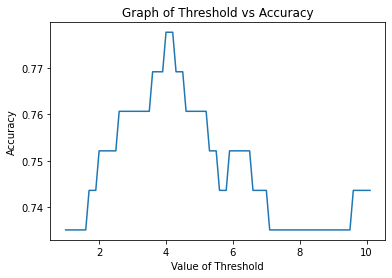

In [49]:
plt.plot(temp1,temp2)
plt.xlabel('Value of Threshold')
plt.ylabel('Accuracy')
plt.title('Graph of Threshold vs Accuracy')
plt.show()

#### Value of Threshold having maximum Accuracy

In [50]:
x = max(temp2)
for i in range(len(temp2)):
    if(temp2[i] == x):
        x = temp1[i]
        break

#### Pruning is done here, showing all the pruned attributes

In [51]:
pruning_tree(final_train_data,best_tree,x)

pruned   ag_ratio
pruned   albumin
pruned   age
pruned   age
pruned   age
pruned   age
pruned   age
pruned   age
pruned   alkphos
pruned   ag_ratio
pruned   age
pruned   sgpt
pruned   age
pruned   albumin
pruned   age
pruned   tot_proteins
pruned   alkphos
pruned   age
pruned   age
pruned   age
pruned   sgot
pruned   age
pruned   tot_proteins
pruned   tot_proteins
pruned   tot_bilirubin
pruned   tot_proteins
pruned   age
pruned   tot_bilirubin
pruned   tot_proteins
pruned   tot_proteins
pruned   age
pruned   age
pruned   alkphos
pruned   age
pruned   age
pruned   age
pruned   sgot
pruned   tot_bilirubin
pruned   age
pruned   age
pruned   age
pruned   age
pruned   ag_ratio
pruned   age
pruned   tot_bilirubin
pruned   age
pruned   albumin
pruned   age
pruned   age
pruned   tot_proteins
pruned   tot_bilirubin
pruned   tot_proteins
pruned   tot_proteins
pruned   age
pruned   age
pruned   direct_bilirubin
pruned   tot_bilirubin
pruned   direct_bilirubin
pruned   albumin
pruned   age
pruned 

(325, 141)

#### Final Complete Tree, after Pruning

In [52]:
printtree(best_tree)

ag_ratio < 41.0
|    |----ag_ratio < 25.0
|    |    |----sgpt < 6.8
|    |    |    |----ag_ratio < 19.0
|    |    |    |    |----ag_ratio < 15.0
|    |    |    |    |    |----albumin < 14.0
|    |    |    |    |    |    |----class:  2
|    |    |    |    |    |----albumin > 14.0
|    |    |    |    |    |    |----class:  1
|    |    |    |    |----ag_ratio > 15.0
|    |    |    |    |    |----direct_bilirubin < 0.2
|    |    |    |    |    |    |----class:  1
|    |    |    |    |    |----direct_bilirubin > 0.2
|    |    |    |    |    |    |----albumin < 21.0
|    |    |    |    |    |    |    |----class:  1
|    |    |    |    |    |    |----albumin > 21.0
|    |    |    |    |    |    |    |----class:  1
|    |    |    |----ag_ratio > 19.0
|    |    |    |    |----alkphos < 1.0
|    |    |    |    |    |----age < 46.5
|    |    |    |    |    |    |----class:  2
|    |    |    |    |    |----age > 46.5
|    |    |    |    |    |    |----class:  1
|    |    |    |    |----alkphos > 1

#### Accuracy of Tree after pruning

In [53]:
accc=accuracy(final_test_data,best_tree)
print(round(accc,2))

True Positve: 80  True Negative:  11  False Positive:  15  False Negative  11
Precision:  0.84  Recall:  0.88  F1 Score:  0.86  Accuracy:  0.78
0.78


#### Threshold Value for Chi-Square

In [54]:
print(round(x,2))

4.0


#### Depth and Number of Nodes After Pruning

In [55]:
depth, nodes = depth_nodes(best_tree)
print('Depth of Tree after pruning:',depth)
print('Number of Nodes in Tree after pruning:',nodes)

Depth of Tree after pruning: 8
Number of Nodes in Tree after pruning: 137
